In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter

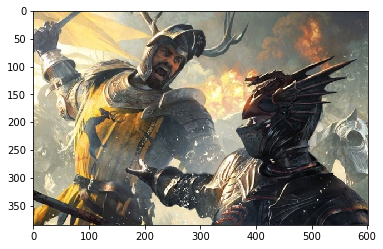

In [2]:
img=cv2.imread("sample.jpg")                            #image is read as BGR
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)                 #converting image to RGB

plt.imshow(img)                                         #matplotlib uses RGB
plt.show()

In [3]:
flat_img=img.reshape(-1,img.shape[2])
flat_img

array([[209, 179, 129],
       [198, 167, 120],
       [202, 173, 131],
       ...,
       [ 64,  66,  65],
       [ 52,  54,  53],
       [ 53,  55,  54]], dtype=uint8)

In [4]:
clf=KMeans(n_clusters=2)
clf

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
clf.fit(flat_img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
centers=clf.cluster_centers_
centers

array([[ 71.67854664,  68.98624185,  64.88487358],
       [196.99351775, 185.21102083, 152.05169668]])

In [7]:
centers=np.array(centers,dtype="int")
centers

array([[ 71,  68,  64],
       [196, 185, 152]])

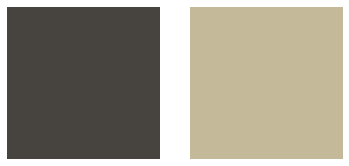

In [8]:
i=1
for col in centers:
    
    plt.subplot(1,2,i)                          #1 row, 4 images in that row (4 columns)
    plt.axis("off")                             #try removing this and u will see what it does
    i+=1                                        #go to the next column
    
    a=np.zeros((100,100,3),dtype="int")         #see video
    a[:,:,:]=col
    
    plt.imshow(a)
    
plt.show()

In [9]:
clf.labels_

array([1, 1, 1, ..., 0, 0, 0])

In [10]:
for i in range(flat_img.shape[0]):
    flat_img[i]=centers[clf.labels_[i]]

flat_img=flat_img.reshape((img.shape[0],img.shape[1],img.shape[2]))
flat_img.shape

(385, 602, 3)

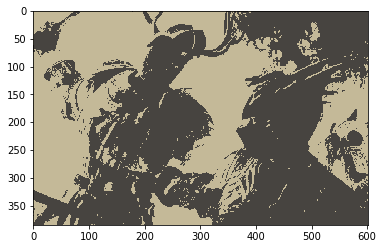

In [11]:
plt.imshow(flat_img)